In [4]:
def build_cv(personal, education, work, skills, projects, publications, summary):
    info = {}
    info.update(personal)

    sections = {}
    if summary:
        sections.update(summary)
    sections.update(education)
    sections.update(work)
    sections.update(skills)
    if projects:
        sections.update(projects)
    if publications:
        sections.update(publications)

    info["sections"] = sections

    return info

In [5]:
def build_design(margins):
    return {
        "theme": "engineeringresumes",
        "font": "Charter",
        "font_size": "10pt",
        "page_size": "a4paper",
        "header_font_size": "20 pt",
        "text_alignment": "left-aligned",
        "use_icons_for_connections": True,
        "margins": margins
    }

In [6]:
personal = {
    "name": "Full Name",
    "email": "youremail@yourdomain.com",
    "phone": "tel:+90-541-999-99-99",
    "website": "https://yourwebsite.com/",
    "social_networks": [
        {"network": "LinkedIn", "username": "yourusername"},
        {"network": "GitHub", "username": "yourusername"},
    ]
}
education = {
    "education": [
        {
            "institution": "University of Pennsylvania",
            "area": "Computer Science",
            "degree": "BS",
            "start_date": "2000-09",
            "end_date": "2005-05",
            "highlights": [
                'GPA: 3.9/4.0',
                '**Coursework:** Computer Architecture, Comparison of Learning Algorithms, Computational Theory'
            ]
        }
    ]
}
work = {
    "experience": [
        {
            "company": "Apple",
            "position": "Software Engineer",
            "location": "Cupertino, CA",
            "start_date": "2005-06",
            "end_date": "2007-08",
            "highlights": [
                "a",
                "b",
                "c"
            ]
        },
    ]
}
skills = {
    "skills": [
        {"label": "Language", "details": "C++, Python"},
        {"label": "Tech", "details": "C++, Python"}
    ]
}
projects = {
    "projects": [
        {"name": "Multi-User Drawing Tool",
            "date": '[code](https://github.com/sinaatalay/rendercv)', "highlights": ["a", "b", "C"]}
    ]
}
publications = {
    "publications": [
        {
            "title": "3D Finite Element Analysis of No-Insulation Coils",
            "authors": ["author 1", "author 2"],
            "date": "NeurIPS 2022"
        }
    ]
}
summary = {
    "Professional Summary": ["summary here"]
}
margins = {
    "page": {
        "top": "1.2 cm",
        "bottom": "1.2 cm",
        "left": "1.2 cm",
        "right": "1.2 cm"
    },
    "section_title": {
        "top": "0.3 cm",
        "bottom": "0.2 cm"
    },
    "entry_area": {
        "left_and_right": "0 cm",
        "vertical_between": "0.2 cm",
        "date_and_location_width": "4.5 cm"
    },
    "highlights_area": {
        "top": "0.10 cm",
        "left": "0 cm",
        "vertical_between_bullet_points": "0.10 cm"
    },
    "header": {
        "vertical_between_name_and_connections": "5 pt",
        "bottom": "5 pt",
        "horizontal_between_connections": "10 pt"
    }
}
cv = build_cv(personal, education, work, skills,
              projects, publications, summary)
design = build_design(margins)

In [10]:
cv

{'name': 'Full Name',
 'email': 'youremail@yourdomain.com',
 'phone': 'tel:+90-541-999-99-99',
 'website': 'https://yourwebsite.com/',
 'social_networks': [{'network': 'LinkedIn', 'username': 'yourusername'},
  {'network': 'GitHub', 'username': 'yourusername'}],
 'sections': {'Professional Summary': ['summary here'],
  'education': [{'institution': 'University of Pennsylvania',
    'area': 'Computer Science',
    'degree': 'BS',
    'start_date': '2000-09',
    'end_date': '2005-05',
    'highlights': ['GPA: 3.9/4.0',
     '**Coursework:** Computer Architecture, Comparison of Learning Algorithms, Computational Theory']}],
  'experience': [{'company': 'Apple',
    'position': 'Software Engineer',
    'location': 'Cupertino, CA',
    'start_date': '2005-06',
    'end_date': '2007-08',
    'highlights': ['a', 'b', 'c']}],
  'skills': [{'label': 'Language', 'details': 'C++, Python'},
   {'label': 'Tech', 'details': 'C++, Python'}],
  'projects': [{'name': 'Multi-User Drawing Tool',
    'da

In [7]:
import yaml
def build_yaml(info):
    with open("output.yaml", mode="w+") as f:
        yaml.dump(info, f)

build_yaml({"cv": cv, "design": design})

In [8]:
import os
from typing import Dict


def render_pdf(cv: Dict, design: Dict, resume_name: str) -> None:
    try:
        build_yaml({"cv": cv, "design": design})

        if not os.path.exists("output.yaml"):
            raise RuntimeError("Fail to generate yaml file, check formatting")

        if not os.path.exists("resume_pdfs"):
            os.makedirs("resume_pdfs")

        render_cmd = "rendercv render 'output.yaml' --dont-generate-markdown --dont-generate-html --dont-generate-png"
        render_cmd += f" --output-folder-name outputs --pdf-path resume_pdfs/{resume_name}.pdf"
        code = os.system(render_cmd)
        if code != 0:
            raise RuntimeError("Fail to run rendercv")
        os.system("rm output.yaml")
        os.system("rm -rf outputs")
    except Exception as e:
        print(e)

In [9]:
render_pdf(cv, design, "test")

A new version of RenderCV is available! You are using v1.12, and the latest 
version is v1.14.
                                                                           
Welcome to RenderCV! Some useful links:                                    
┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Title             ┃                                                Link ┃
┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Documentation     │                           https://docs.rendercv.com │
│ Source code       │             https://github.com/sinaatalay/rendercv/ │
│ Bug reports       │      https://github.com/sinaatalay/rendercv/issues/ │
│ Feature requests  │      https://github.com/sinaatalay/rendercv/issues/ │
│ Discussions       │ https://github.com/sinaatalay/rendercv/discussions/ │
│ RenderCV Pipeline │    https://github.com/sinaatalay/rendercv-pipeline/ │
└───────────────────┴────────────────────────────────────────────────

Accuracy: 0.6666666666666666
Precision: 0.75
Recall: 0.75
F1 Score: 0.75
ROC-AUC: 0.875


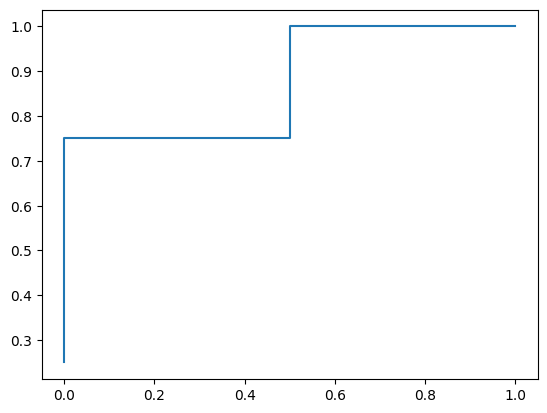

In [5]:
import math
import matplotlib.pyplot as plt

def confusion_matrix(y_true, y_pred):
    tp = sum((y_t == 1 and y_p == 1) for y_t, y_p in zip(y_true, y_pred))
    tn = sum((y_t == 0 and y_p == 0) for y_t, y_p in zip(y_true, y_pred))
    fp = sum((y_t == 0 and y_p == 1) for y_t, y_p in zip(y_true, y_pred))
    fn = sum((y_t == 1 and y_p == 0) for y_t, y_p in zip(y_true, y_pred))
    return tp, tn, fp, fn

def accuracy(y_true, y_pred):
    tp, tn, fp, fn = confusion_matrix(y_true, y_pred)
    return (tp + tn) / (tp + tn + fp + fn)

def precision(y_true, y_pred):
    tp, _, fp, _ = confusion_matrix(y_true, y_pred)
    return tp / (tp + fp) if (tp + fp) > 0 else 0

def recall(y_true, y_pred):
    tp, _, _, fn = confusion_matrix(y_true, y_pred)
    return tp / (tp + fn) if (tp + fn) > 0 else 0

def f1_score(y_true, y_pred):
    prec = precision(y_true, y_pred)
    rec = recall(y_true, y_pred)
    return 2 * (prec * rec) / (prec + rec) if (prec + rec) > 0 else 0

def roc_auc(y_true, y_scores):
    # Sort scores and corresponding true values
    sorted_pairs = sorted(zip(y_scores, y_true), key=lambda x: x[0], reverse=True)
    sorted_scores, sorted_true = zip(*sorted_pairs)
    
    # Calculate TPR and FPR at each threshold
    tpr, fpr = [], []
    tp, fp, fn, tn = 0, 0, sum(y_true), len(y_true) - sum(y_true)
    
    for i in range(len(sorted_scores)):
        if sorted_true[i] == 1:
            tp += 1
            fn -= 1
        else:
            fp += 1
            tn -= 1
        
        tpr.append(tp / (tp + fn) if (tp + fn) > 0 else 0)
        fpr.append(fp / (fp + tn) if (fp + tn) > 0 else 0)

    plt.plot(fpr, tpr)
    
    # Calculate AUC using trapezoidal rule
    auc = 0
    for i in range(1, len(tpr)):
        auc += (fpr[i] - fpr[i-1]) * (tpr[i] + tpr[i-1]) / 2
    
    return auc

# Example usage:
y_true = [1, 0, 1, 1, 0, 1]
y_pred = [1, 0, 1, 0, 1, 1]
y_scores = [0.9, 0.3, 0.8, 0.6, 0.7, 0.9]

print(f"Accuracy: {accuracy(y_true, y_pred)}")
print(f"Precision: {precision(y_true, y_pred)}")
print(f"Recall: {recall(y_true, y_pred)}")
print(f"F1 Score: {f1_score(y_true, y_pred)}")
print(f"ROC-AUC: {roc_auc(y_true, y_scores)}")